In [1]:
import pandas as pd

# Ruta al archivo JSON
file_path = '..\PI MLOps - STEAM\steam_games.json'

# Leer el archivo JSON línea por línea y cargar los datos en una lista
data_list = []
with open(file_path, 'r') as f:
    for line in f:
        data_list.append(eval(line.strip()))

# Crear DataFrame a partir de la lista de diccionarios
df = pd.DataFrame(data_list)

# Mostrar las primeras filas del DataFrame
print(df.head())

          publisher                                             genres  \
0         Kotoshiro      [Action, Casual, Indie, Simulation, Strategy]   
1  Making Fun, Inc.               [Free to Play, Indie, RPG, Strategy]   
2      Poolians.com  [Casual, Free to Play, Indie, Simulation, Sports]   
3              彼岸领域                        [Action, Adventure, Casual]   
4               NaN                                                NaN   

                  app_name                    title  \
0      Lost Summoner Kitty      Lost Summoner Kitty   
1                Ironbound                Ironbound   
2  Real Pool 3D - Poolians  Real Pool 3D - Poolians   
3                  弹炸人2222                  弹炸人2222   
4            Log Challenge                      NaN   

                                                 url release_date  \
0  http://store.steampowered.com/app/761140/Lost_...   2018-01-04   
1  http://store.steampowered.com/app/643980/Ironb...   2018-01-04   
2  http://store.s

In [3]:
# Convertir la columna de fechas a formato datetime
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d', errors='coerce')


In [5]:
import pandas as pd

# Convertir la columna "price" a valores numéricos
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Mostrar las estadísticas descriptivas para la columna "price"
print(df['price'].describe())

count    28848.000000
mean         9.453921
std         16.251641
min          0.490000
25%          2.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: price, dtype: float64


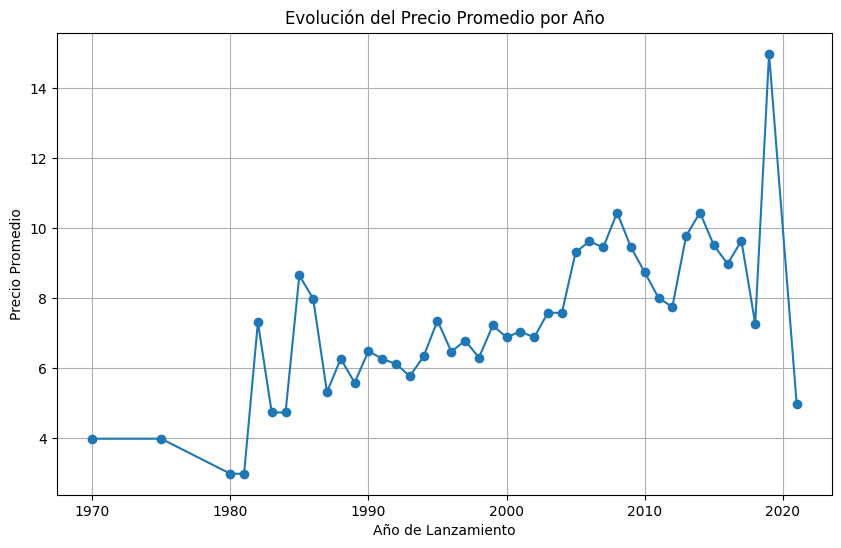

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear una figura y un eje para el gráfico
plt.figure(figsize=(10, 6))

# Agrupar los datos por año de lanzamiento y calcular el precio promedio
price_by_year = df.groupby(df['release_date'].dt.year)['price'].mean()

# Crear el gráfico de líneas
plt.plot(price_by_year.index, price_by_year.values, marker='o')

# Etiquetas y título
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Precio Promedio')
plt.title('Evolución del Precio Promedio por Año')

# Mostrar el gráfico
plt.grid(True)
plt.show()

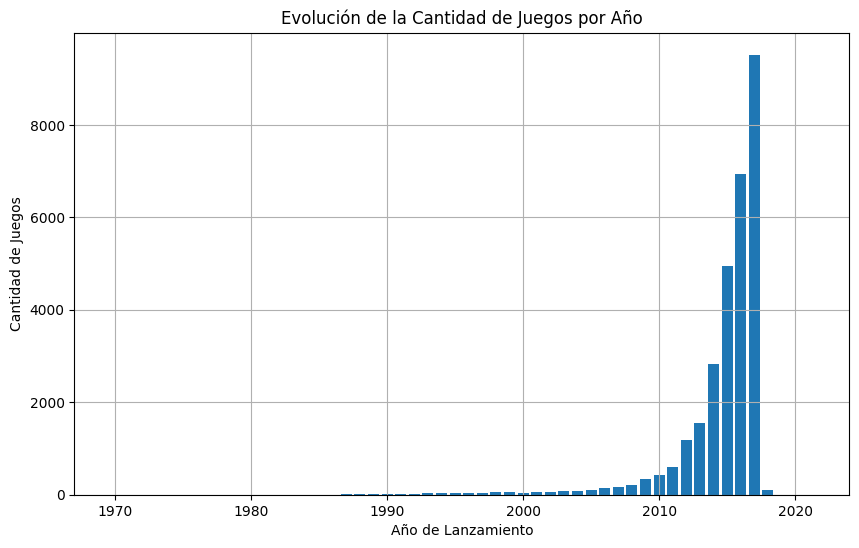

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear una figura y un eje para el gráfico
plt.figure(figsize=(10, 6))

# Contar la cantidad de juegos por año de lanzamiento
games_by_year = df.groupby(df['release_date'].dt.year)['app_name'].count()

# Crear el gráfico de barras
plt.bar(games_by_year.index, games_by_year.values)

# Etiquetas y título
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Juegos')
plt.title('Evolución de la Cantidad de Juegos por Año')

# Mostrar el gráfico
plt.grid(True)
plt.show()

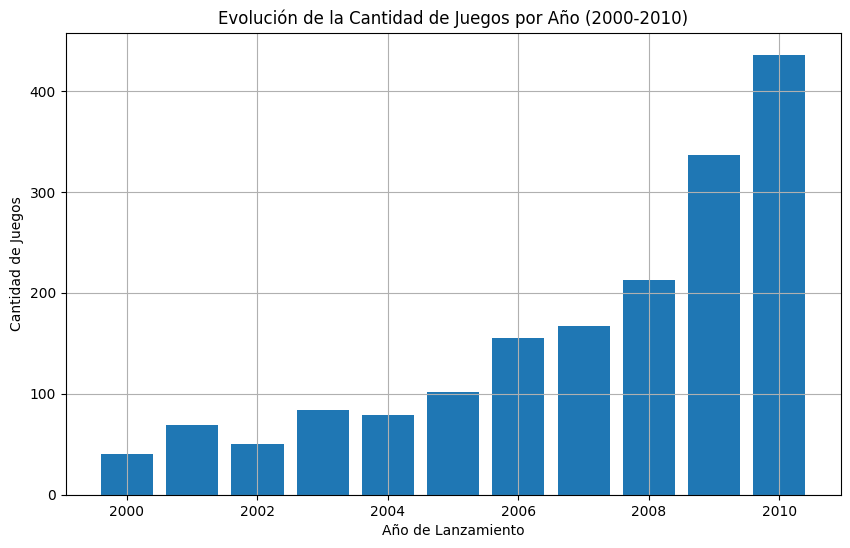

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar los datos para el rango de años 2000 a 2010
filtered_data = df[df['release_date'].dt.year.between(2000, 2010)]

# Crear una figura y un eje para el gráfico
plt.figure(figsize=(10, 6))

# Contar la cantidad de juegos por año de lanzamiento en el rango de 2000 a 2010
games_by_year = filtered_data.groupby(filtered_data['release_date'].dt.year)['app_name'].count()

# Crear el gráfico de barras
plt.bar(games_by_year.index, games_by_year.values)

# Etiquetas y título
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Juegos')
plt.title('Evolución de la Cantidad de Juegos por Año (2000-2010)')

# Mostrar el gráfico
plt.grid(True)
plt.show()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
# Convertir la columna "price" a valores numéricos
df['metascore'] = pd.to_numeric(df['metascore'], errors='coerce')

# Mostrar las estadísticas descriptivas para la columna "price"
print(df['metascore'].describe())

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32135 entries, 0 to 32134
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   publisher       24083 non-null  object        
 1   genres          28852 non-null  object        
 2   app_name        32133 non-null  object        
 3   title           30085 non-null  object        
 4   url             32135 non-null  object        
 5   release_date    29783 non-null  datetime64[ns]
 6   tags            31972 non-null  object        
 7   discount_price  225 non-null    float64       
 8   reviews_url     32133 non-null  object        
 9   specs           31465 non-null  object        
 10  price           28848 non-null  float64       
 11  early_access    32135 non-null  bool          
 12  id              32133 non-null  object        
 13  developer       28836 non-null  object        
 14  sentiment       24953 non-null  object        
 15  me

In [ ]:
import pandas as pd

def juegos_por_año(df, año):
    # Filtrar el DataFrame para obtener solo los juegos del año proporcionado
    juegos_del_año = df[df['release_date'].str.startswith(año) & pd.notna(df['release_date'])]
    
    # Validar si se encontraron juegos para el año dado
    if juegos_del_año.empty:
        return f"No se encontraron juegos para el año {año}"
    
    # Obtener la lista de nombres de juegos
    lista_juegos = sorted(juegos_del_año['app_name'].tolist())
    
    # Devolver la lista de juegos
    return lista_juegos

resultado = juegos_por_año(df, '2018')  # Convierte el año en una cadena de texto
print(resultado)

In [ ]:
print(df.describe())

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

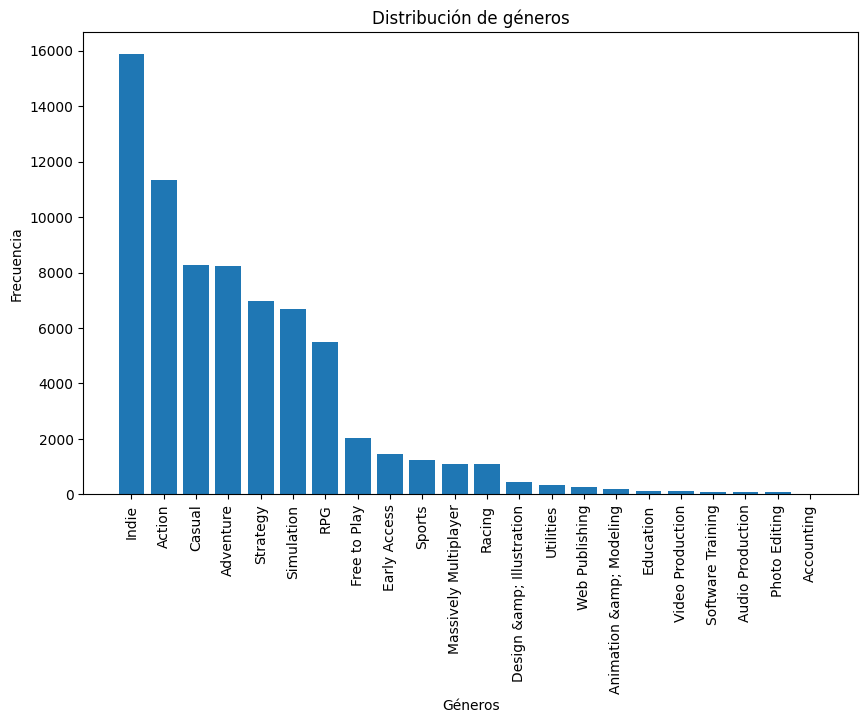

In [11]:

# Visualización de la distribución de géneros utilizando un gráfico de barras
genre_counts = df['genres'].explode().value_counts()
plt.figure(figsize=(10, 6))
plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel('Géneros')
plt.ylabel('Frecuencia')
plt.title('Distribución de géneros')
plt.xticks(rotation=90)
plt.show()

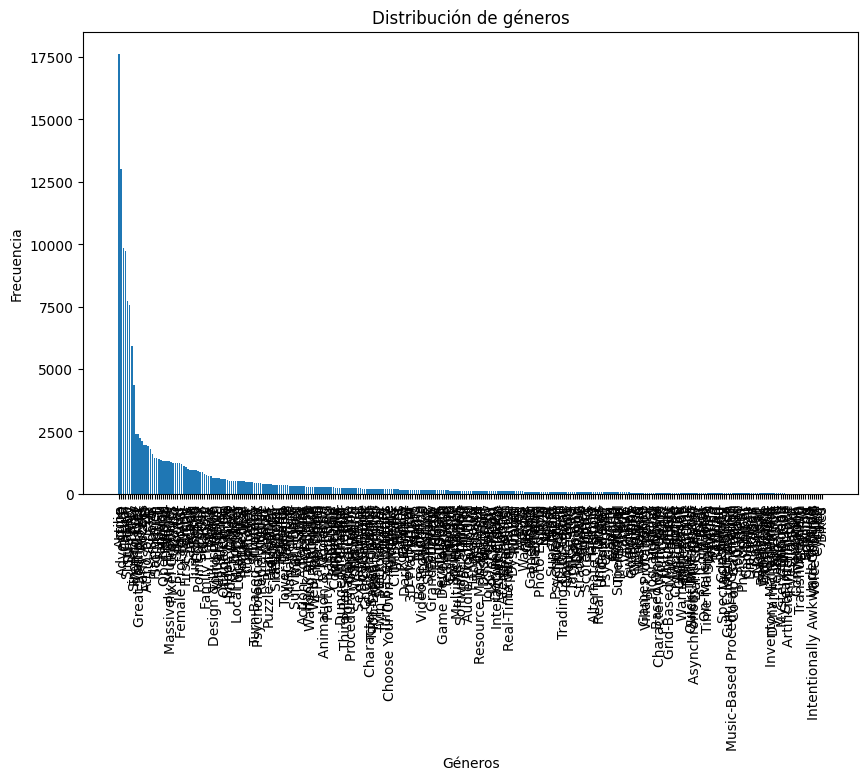

In [12]:
# Visualización de la distribución de géneros utilizando un gráfico de barras
genre_counts = df['tags'].explode().value_counts()
plt.figure(figsize=(10, 6))
plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel('Géneros')
plt.ylabel('Frecuencia')
plt.title('Distribución de géneros')
plt.xticks(rotation=90)
plt.show()

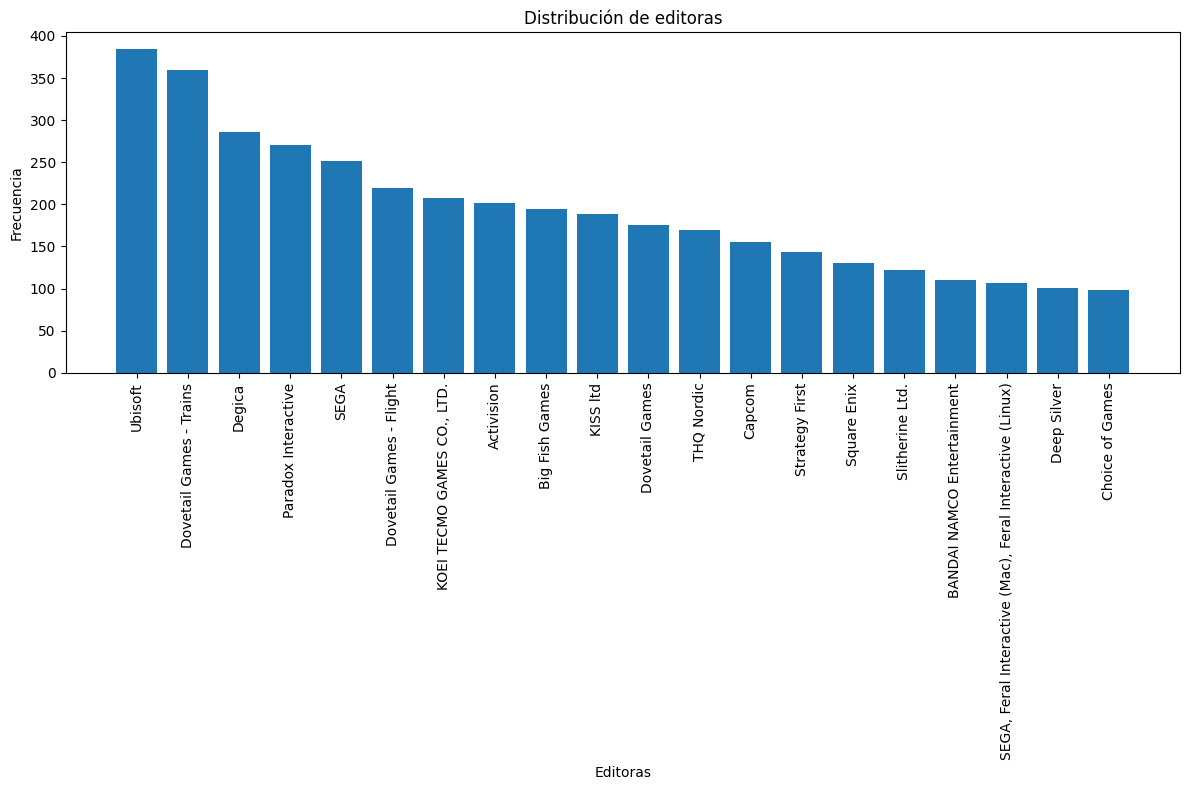

In [13]:
import matplotlib.pyplot as plt

# Visualización de la distribución de editoras utilizando un gráfico de barras
publisher_counts = df['publisher'].value_counts().head(20)  # Mostrar las primeras 20 editoras más frecuentes
publisher_counts = publisher_counts.sort_values(ascending=False)  # Ordenar las editoras por frecuencia

plt.figure(figsize=(12, 8))  # Aumentar el tamaño del gráfico
plt.bar(publisher_counts.index, publisher_counts.values)
plt.xlabel('Editoras')
plt.ylabel('Frecuencia')
plt.title('Distribución de editoras')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje X 45 grados
plt.tight_layout()  # Ajustar automáticamente el espacio entre las etiquetas
plt.show()

Variables categóricas:
Index(['publisher', 'genres', 'app_name', 'title', 'url', 'tags',
       'reviews_url', 'specs', 'early_access', 'id', 'developer', 'sentiment',
       'metascore'],
      dtype='object')
Columna 'publisher' tiene 8239 valores únicos.
Columna 'app_name' tiene 32094 valores únicos.
Columna 'title' tiene 30054 valores únicos.
Columna 'url' tiene 32135 valores únicos.
Columna 'reviews_url' tiene 32132 valores únicos.
Columna 'early_access' tiene 2 valores únicos.
Columna 'id' tiene 32132 valores únicos.
Columna 'developer' tiene 10992 valores únicos.
Columna 'sentiment' tiene 18 valores únicos.
Columna 'metascore' tiene 71 valores únicos.


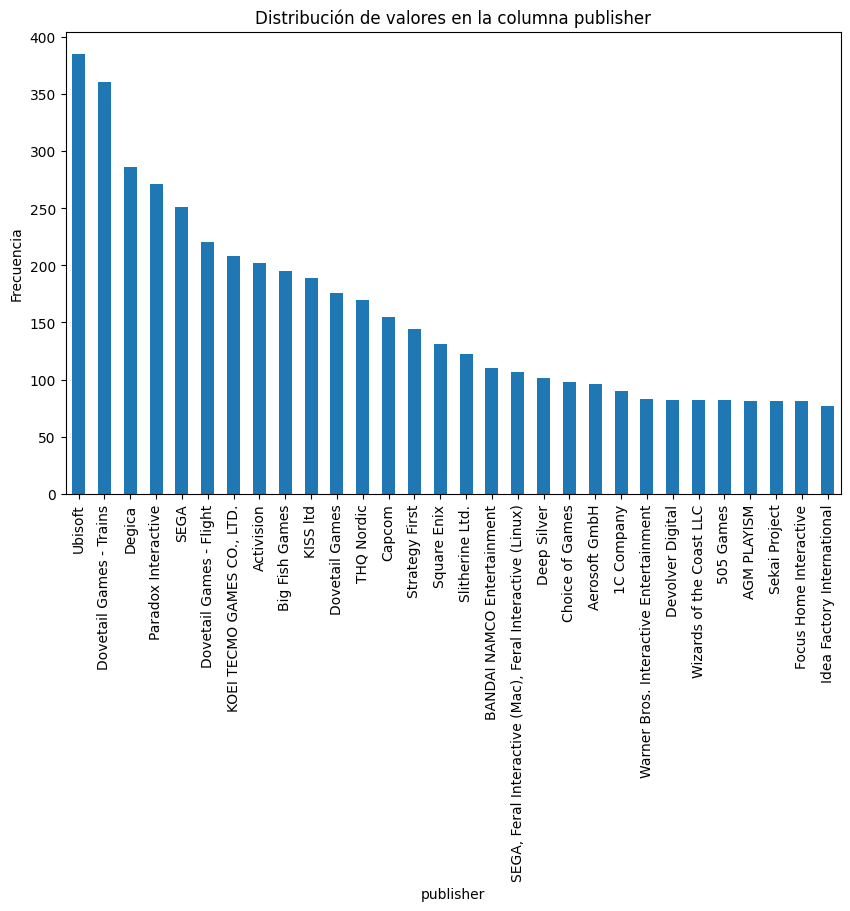

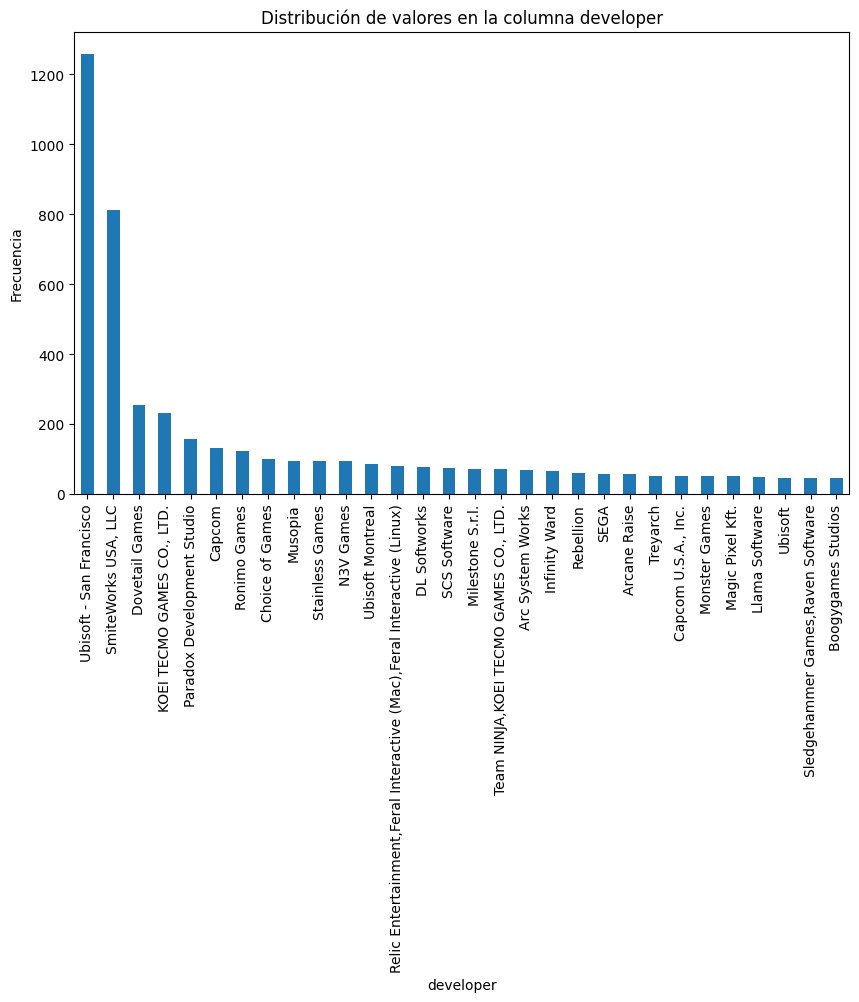

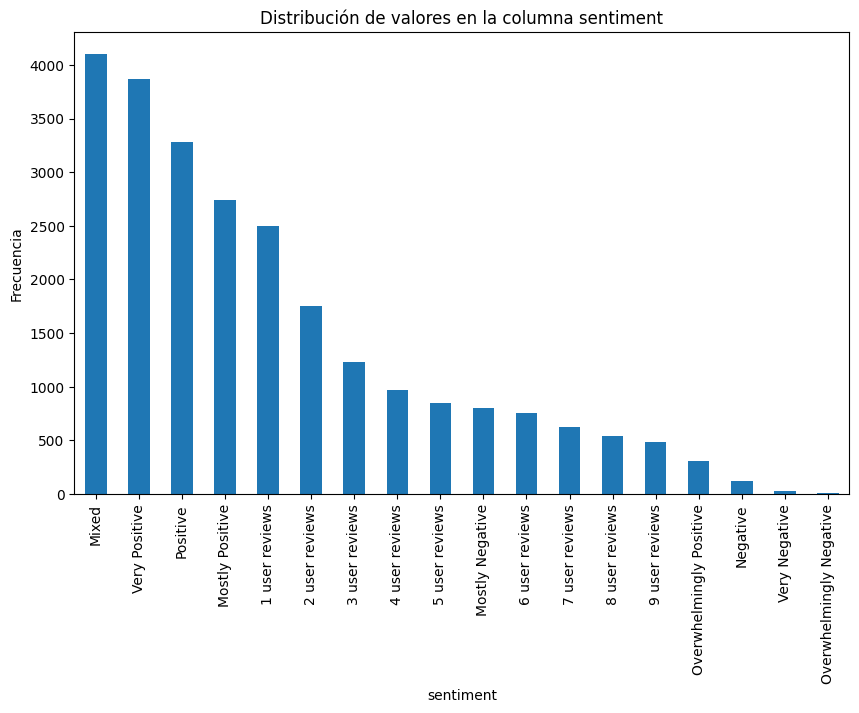

Tabla de frecuencia para 'sentiment':
                      Valor  Frecuencia
0                     Mixed        4103
1             Very Positive        3868
2                  Positive        3281
3           Mostly Positive        2744
4            1 user reviews        2496
5            2 user reviews        1756
6            3 user reviews        1231
7            4 user reviews         964
8            5 user reviews         846
9           Mostly Negative         802
10           6 user reviews         756
11           7 user reviews         619
12           8 user reviews         537
13           9 user reviews         488
14  Overwhelmingly Positive         303
15                 Negative         123
16            Very Negative          29
17  Overwhelmingly Negative           7


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtener información sobre las variables categóricas
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns
print("Variables categóricas:")
print(categorical_columns)

# Contar los valores únicos en cada columna categórica (excepto las columnas con listas)
list_columns = ['genres', 'tags', 'specs']  # Columnas que contienen listas
categorical_columns = [col for col in categorical_columns if col not in list_columns]

for col in categorical_columns:
    unique_values = df[col].nunique()
    print(f"Columna '{col}' tiene {unique_values} valores únicos.")

# Realizar gráfico de barras para algunas columnas categóricas (solo los primeros 30 valores)
columns_to_plot = ['publisher', 'developer', 'sentiment'] + list_columns
for col in columns_to_plot:
    if col in categorical_columns:
        plt.figure(figsize=(10, 6))
        top_30_values = df[col].value_counts().sort_values(ascending=False).head(30)
        top_30_values.plot(kind='bar')
        plt.title(f'Distribución de valores en la columna {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.show()

# Calcular la tabla de frecuencia para una columna categórica específica
column_to_freq = 'sentiment'
if column_to_freq in categorical_columns:
    freq_table = df[column_to_freq].value_counts().reset_index()
    freq_table.columns = ['Valor', 'Frecuencia']
    print(f"Tabla de frecuencia para '{column_to_freq}':")
    print(freq_table)

In [15]:
column_to_freq = 'genres'
if column_to_freq in categorical_columns:
    # Crear una lista plana de todos los géneros presentes en el DataFrame
    all_genres = [genre for genres_list in df[column_to_freq] for genre in genres_list]
    
    # Calcular la frecuencia de cada género
    genre_freq = Counter(all_genres)
    
    # Crear un DataFrame a partir del diccionario de frecuencias
    freq_table = pd.DataFrame.from_dict(genre_freq, orient='index', columns=['Frecuencia']).reset_index()
    freq_table.columns = ['Genero', 'Frecuencia']
    
    print(f"Tabla de frecuencia para '{column_to_freq}':")
    print(freq_table)

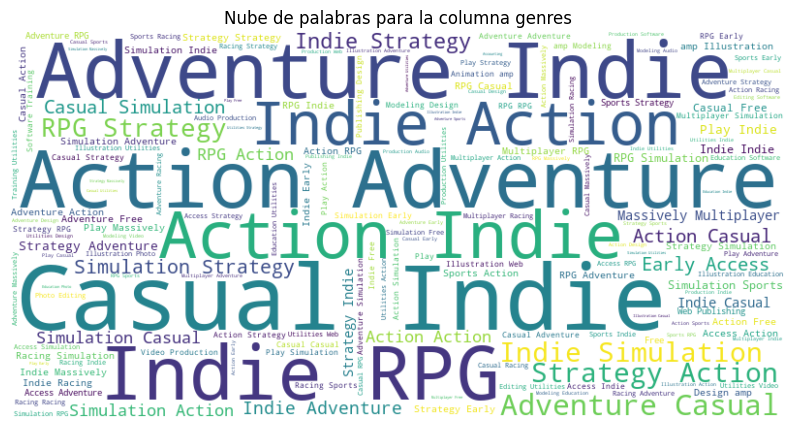

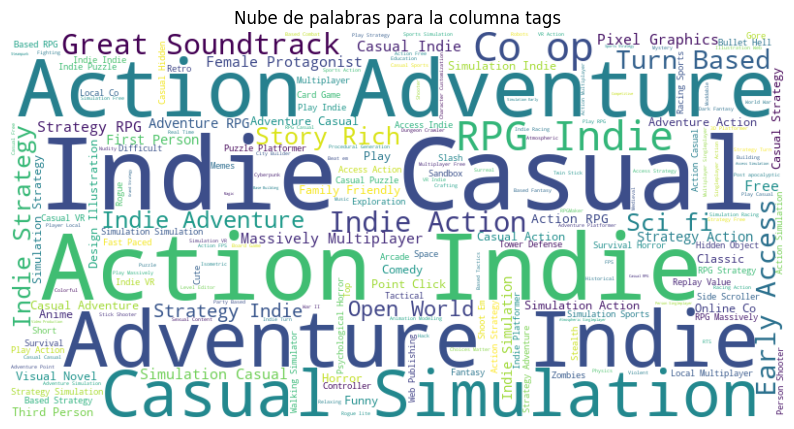

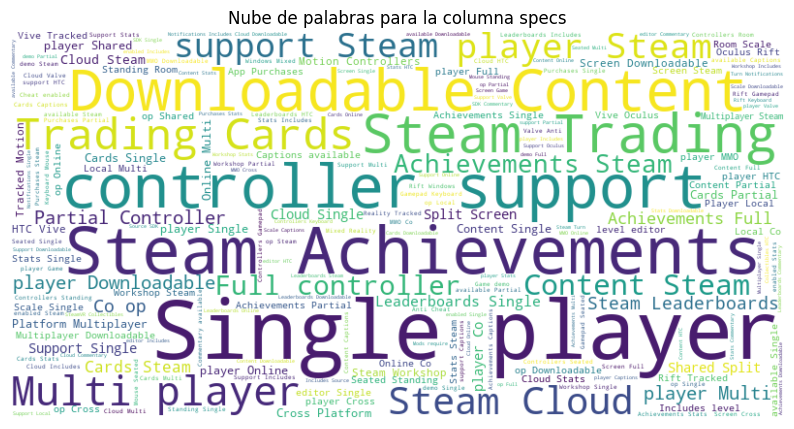

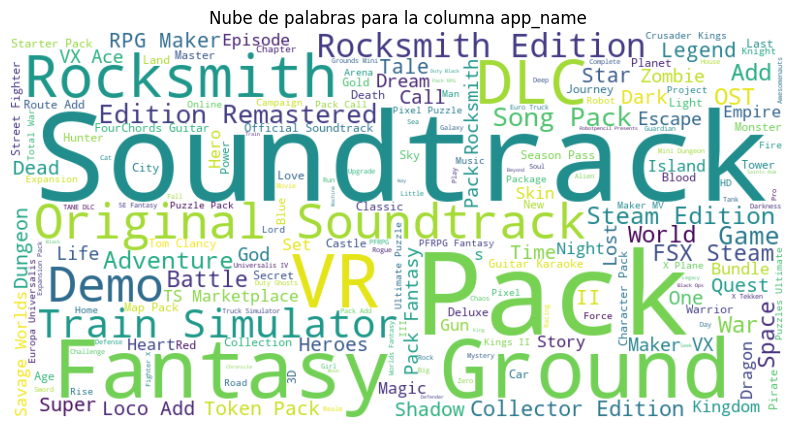

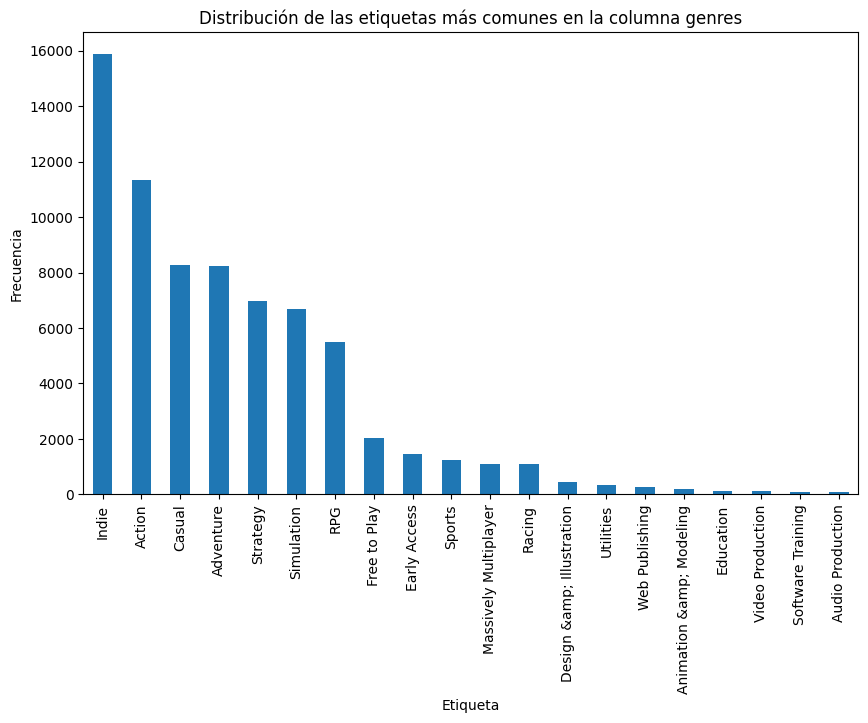

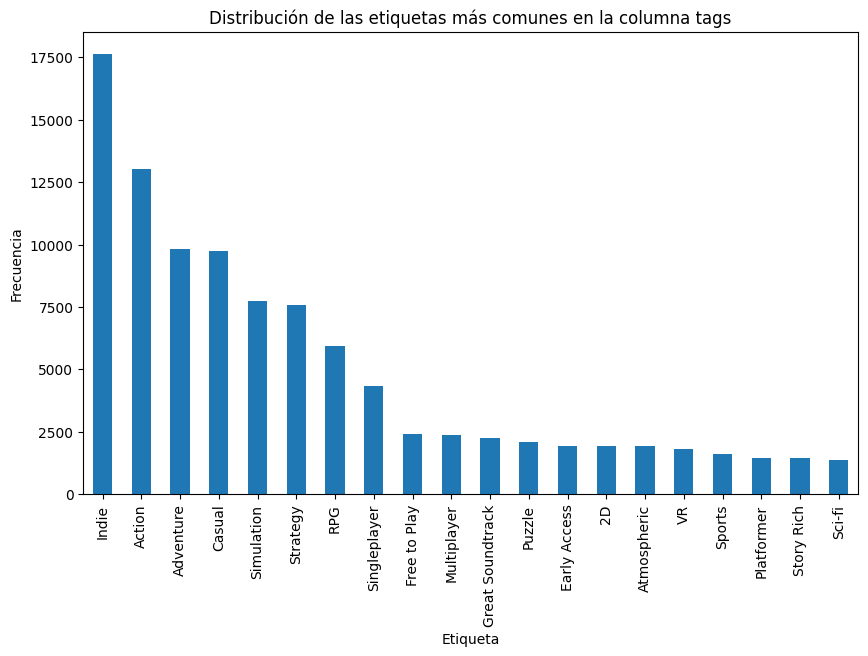

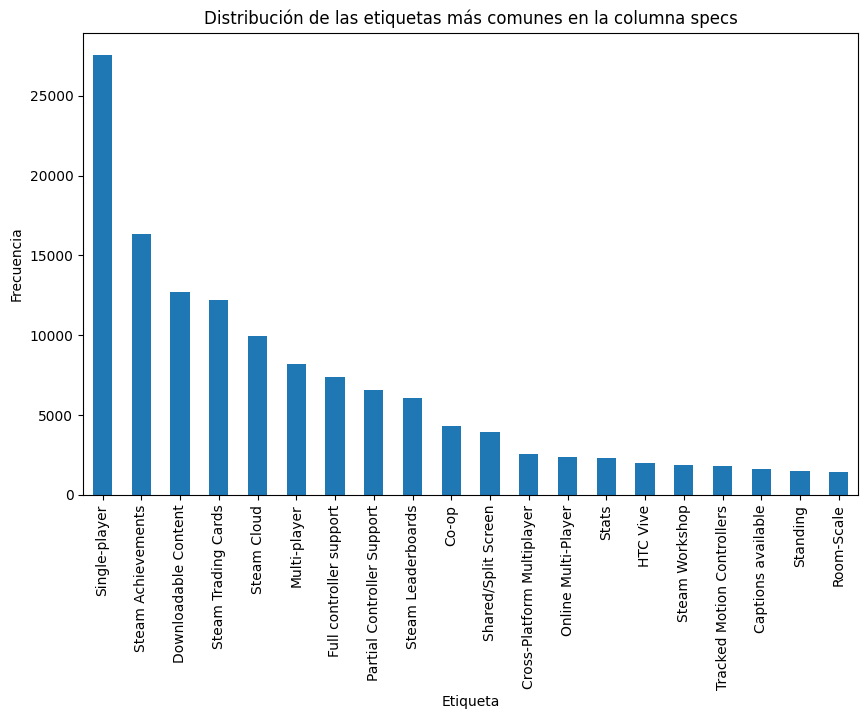

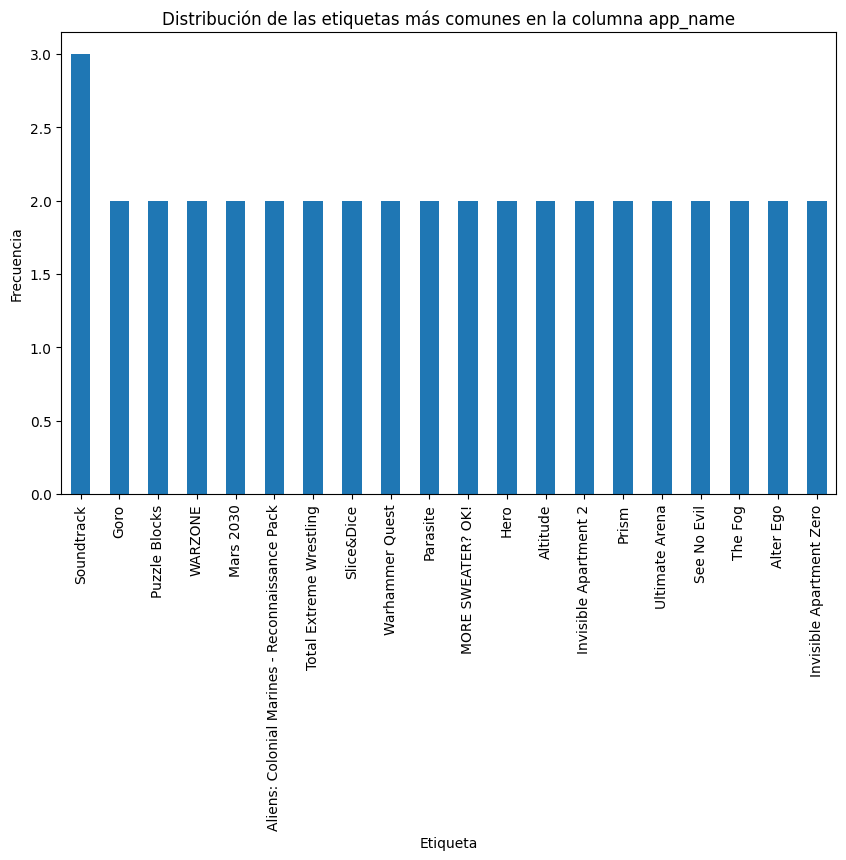

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generar nubes de palabras para las columnas 'genres', 'tags' y 'specs'
columns_to_analyze = ['genres', 'tags', 'specs', 'app_name']

for col in columns_to_analyze:
    if col in df.columns:
        # Unir todas las listas en una sola cadena de texto
        text = ' '.join(df[col].explode().dropna())
        
        # Generar la nube de palabras
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        
        # Mostrar la nube de palabras
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Nube de palabras para la columna {col}')
        plt.axis('off')
        plt.show()

# Contar la frecuencia de las etiquetas en cada columna y mostrar los 20 más comunes
for col in columns_to_analyze:
    if col in df.columns:
        # Contar la frecuencia de cada etiqueta
        tag_counts = df[col].explode().value_counts().head(20)
        
        # Graficar la distribución de las etiquetas más comunes
        plt.figure(figsize=(10, 6))
        tag_counts.plot(kind='bar')
        plt.title(f'Distribución de las etiquetas más comunes en la columna {col}')
        plt.xlabel('Etiqueta')
        plt.ylabel('Frecuencia')
        plt.show()

Estadísticas descriptivas para las variables numéricas:
       discount_price         price
count      225.000000  28848.000000
mean        11.930533      9.453921
std         17.492643     16.251641
min          0.490000      0.490000
25%          1.390000      2.990000
50%          4.190000      4.990000
75%         22.660000      9.990000
max        139.990000    995.000000


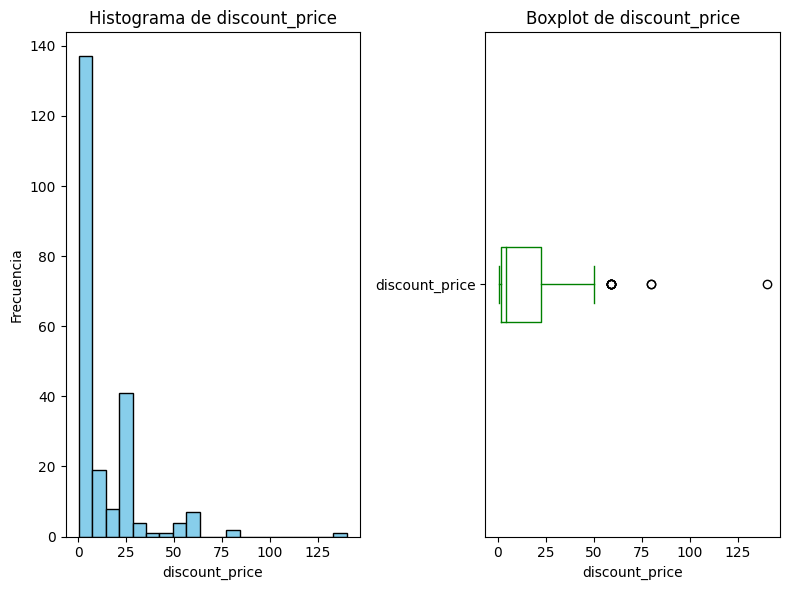

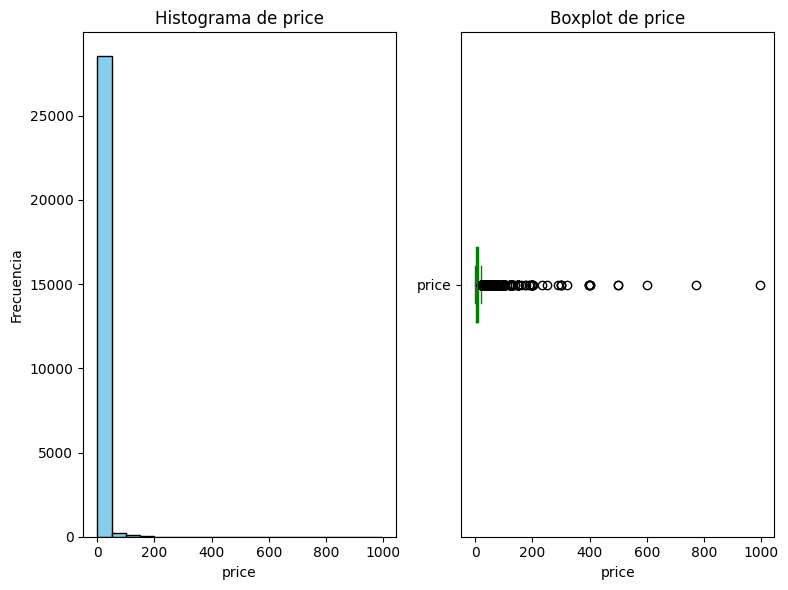

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Estadísticas descriptivas para las variables numéricas
numeric_columns = df.select_dtypes(include=['float64']).columns
numeric_stats = df[numeric_columns].describe()

print("Estadísticas descriptivas para las variables numéricas:")
print(numeric_stats)

# Gráficos para visualizar la distribución de las variables numéricas
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    
    # Histograma
    plt.subplot(1, 2, 1)
    df[col].plot(kind='hist', bins=20, edgecolor='black', color='skyblue')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    df[col].plot(kind='box', vert=False, color='green')
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()

In [19]:
print(df['price'].describe())

count    28848.000000
mean         9.453921
std         16.251641
min          0.490000
25%          2.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: price, dtype: float64


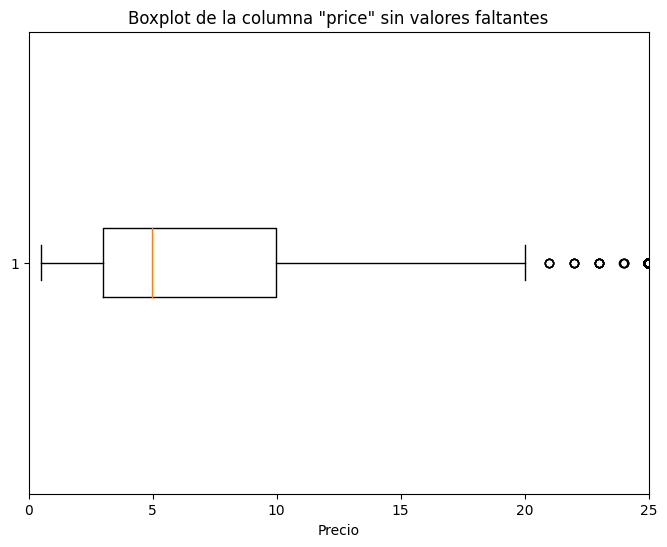

In [18]:

# Eliminar valores faltantes en la columna "price"
price_without_nan = df['price'].dropna()

# Crear el boxplot para la columna "price" sin valores faltantes y con límite en el rango de 0 a 200
plt.figure(figsize=(8, 6))
plt.boxplot(price_without_nan, vert=False)
plt.xlabel('Precio')
plt.title('Boxplot de la columna "price" sin valores faltantes')
plt.xlim(0, 25)  # Establecer límites en el eje x
plt.show()

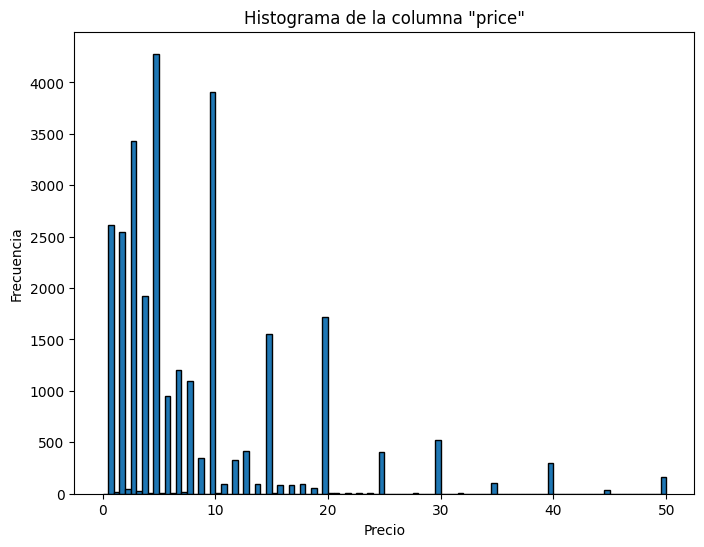

In [20]:
# Crear el histograma para la columna "price"
plt.figure(figsize=(8, 6))
plt.hist(df['price'], bins=100, range=(0, 50), edgecolor='black')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de la columna "price"')
plt.show()

In [ ]:
df1.info()

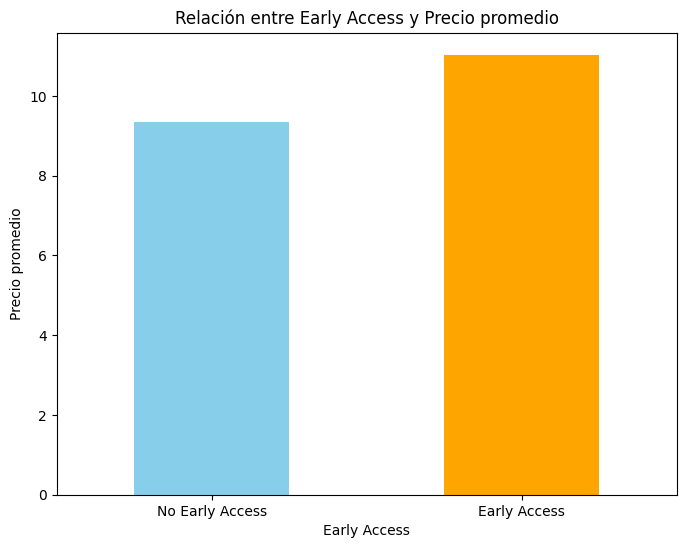

In [22]:
import matplotlib.pyplot as plt

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
df.groupby('early_access')['price'].mean().plot(kind='bar', color=['skyblue', 'orange'])
plt.xticks(ticks=[0, 1], labels=['No Early Access', 'Early Access'], rotation=0)
plt.xlabel('Early Access')
plt.ylabel('Precio promedio')
plt.title('Relación entre Early Access y Precio promedio')
plt.show()

<Figure size 2000x600 with 0 Axes>

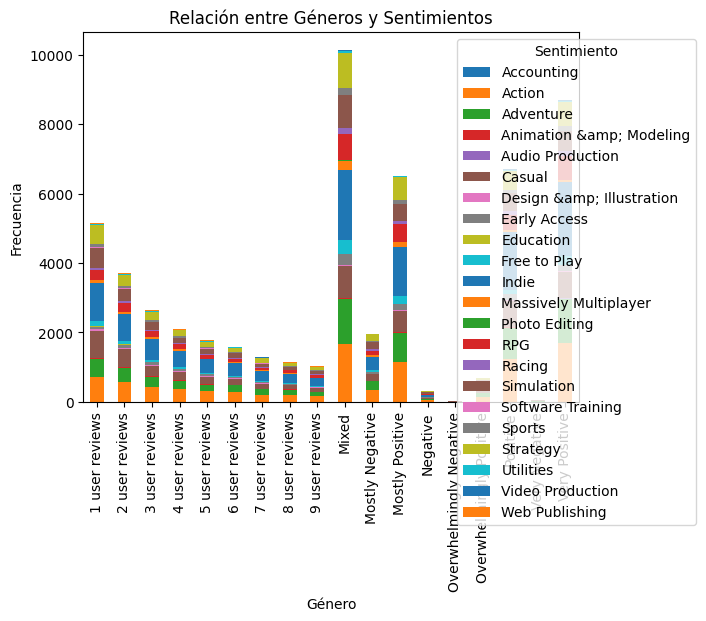

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtener un DataFrame de géneros binarios (one-hot encoding)
genres_df = df['genres'].str.join(',').str.get_dummies(',')

# Concatenar el DataFrame de géneros binarios con la columna de sentimientos
genre_sentiment_df = pd.concat([genres_df, df['sentiment']], axis=1)

# Calcular la frecuencia de sentimientos por género
genre_sentiment_cross_tab = genre_sentiment_df.groupby('sentiment').sum()

# Crear el gráfico de barras
plt.figure(figsize=(20, 6))
genre_sentiment_cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.title('Relación entre Géneros y Sentimientos')
plt.legend(title='Sentimiento', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.xticks(rotation=90)
plt.show()

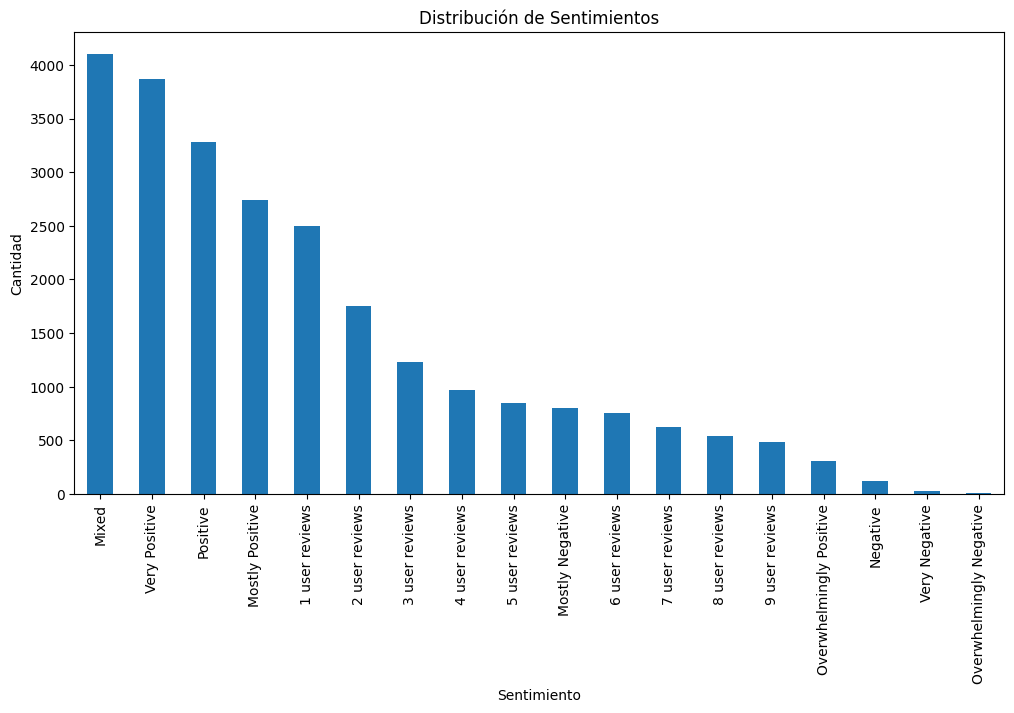

In [23]:
import matplotlib.pyplot as plt

# Agrupar los datos por sentimiento y contar la cantidad de videojuegos en cada categoría
sentiment_counts = df['sentiment'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sentiment_counts.plot(kind='bar')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad')
plt.title('Distribución de Sentimientos')
plt.xticks(rotation=90)
plt.show()

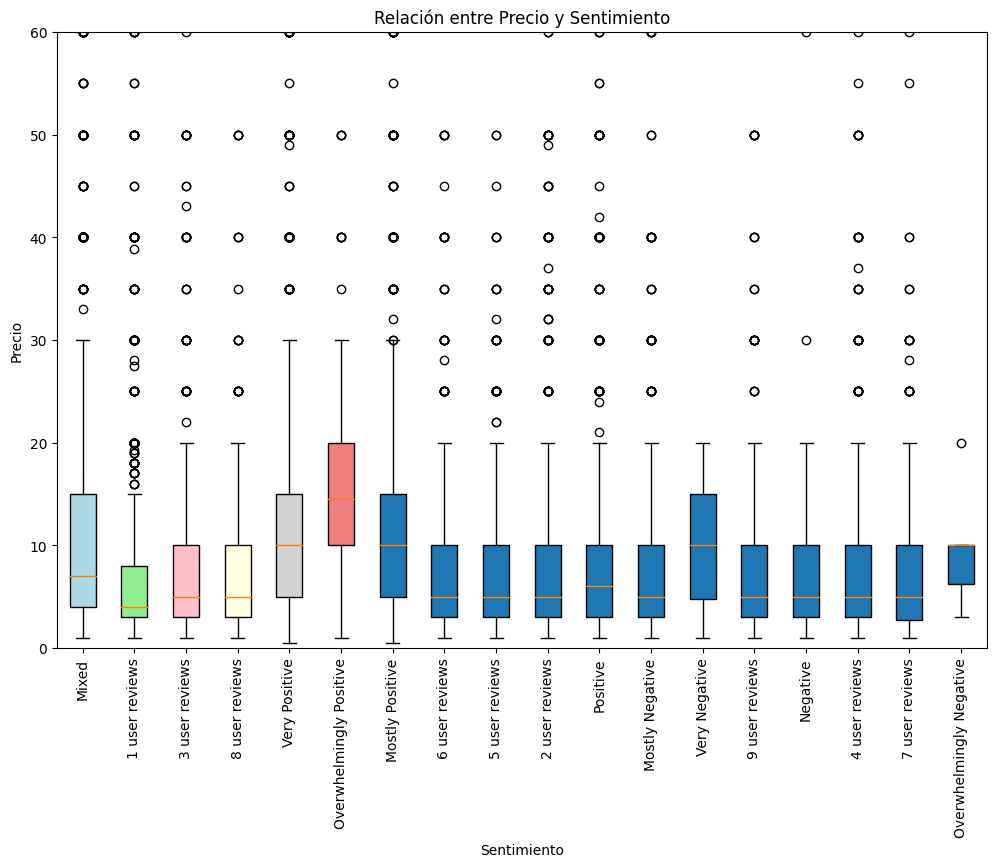

In [24]:
import matplotlib.pyplot as plt

# Filtrar datos con valores válidos para precio y sentimiento
filtered_data = df.dropna(subset=['price', 'sentiment'])

# Crear el boxplot
plt.figure(figsize=(12, 8))  # Aumentar el tamaño del gráfico
boxplot = plt.boxplot([filtered_data[filtered_data['sentiment'] == sentiment]['price'] for sentiment in filtered_data['sentiment'].unique()], 
                      labels=filtered_data['sentiment'].unique(),
                      patch_artist=True)  # Habilitar relleno de las cajas

# Asignar colores a las cajas
colors = ['lightblue', 'lightgreen', 'pink', 'lightyellow', 'lightgrey', 'lightcoral']
for box, color in zip(boxplot['boxes'], colors):
    box.set(facecolor=color)

plt.xlabel('Sentimiento')
plt.ylabel('Precio')
plt.title('Relación entre Precio y Sentimiento')
plt.xticks(rotation=90)

# Limitar el eje y entre 0 y 100
plt.ylim(0, 60)

plt.show()

In [26]:
# Crear una lista que contenga todas las palabras en la columna "app_name"
all_words = ' '.join(df['app_name'].dropna()).split()

# Convertir la lista en un conjunto para obtener palabras únicas
unique_words = set(all_words)

# Calcular la cantidad de palabras diferentes
num_unique_words = len(unique_words)

print(f"La cantidad de palabras diferentes en la columna 'app_name' es: {num_unique_words}")

La cantidad de palabras diferentes en la columna 'app_name' es: 26130


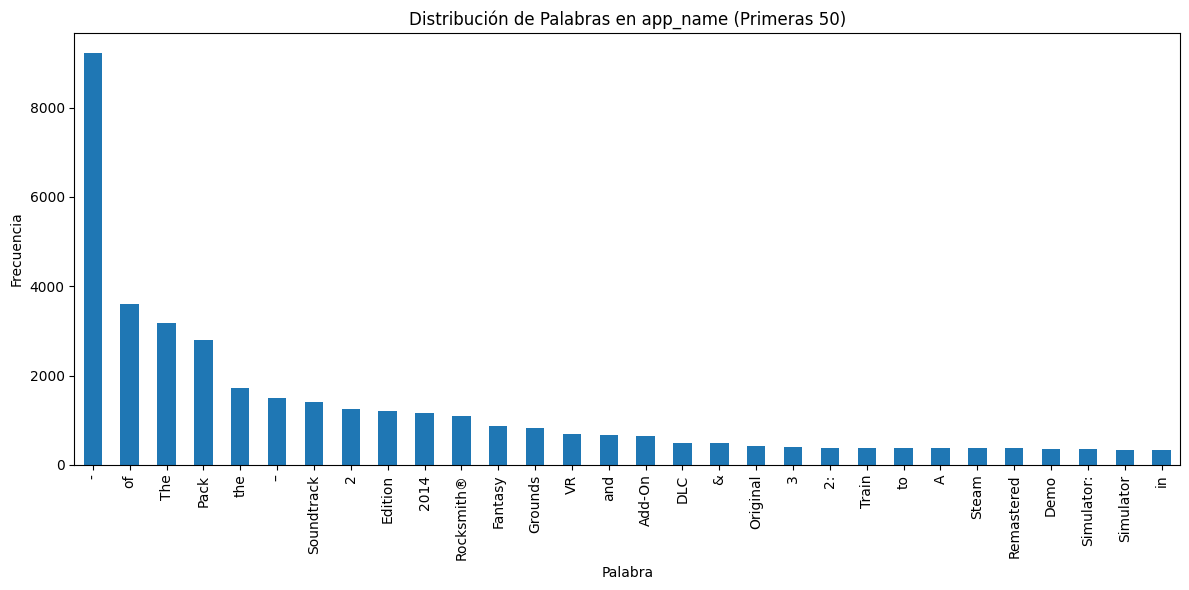

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear una lista que contenga todas las palabras en la columna "app_name"
all_words = ' '.join(df['app_name'].dropna()).split()

# Convertir la lista en un conjunto para obtener palabras únicas
unique_words = set(all_words)

# Calcular la cantidad de palabras diferentes
num_unique_words = len(unique_words)

# Crear un DataFrame para el gráfico de barras
word_counts = pd.Series(all_words).value_counts().head(30)

# Graficar la distribución de palabras diferentes
plt.figure(figsize=(12, 6))
word_counts.plot(kind='bar')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Distribución de Palabras en app_name (Primeras 50)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [28]:
# Obtener el tipo de valores en la columna "specs"
type_column = df['specs'].apply(type)

# Mostrar los tipos únicos presentes en la columna
unique_types = type_column.unique()
print(unique_types)

[<class 'list'> <class 'float'>]
